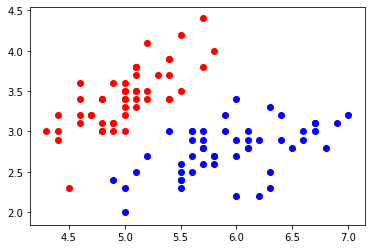

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data.copy()
y = iris.target.copy()

X = X[y<2, :2]
y = y[y<2]

plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()


In [38]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [39]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_standard, y)
print(svm.intercept_)
print(svm.coef_)


[0.25980856]
[[ 1.68971182 -1.24087944]]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


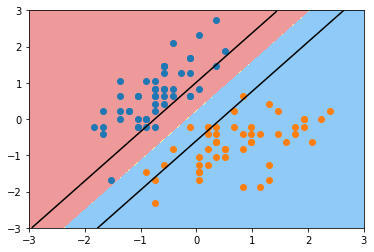

In [40]:
import matplotlib.pyplot as plt

def plot_svm_decision_boundary(svm_model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = svm_model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

    w = svm_model.coef_[0]
    b = svm_model.intercept_[0]
    plot_x = np.linspace(axis[2], axis[3], 200)
    y_up = (1 - w[0]*plot_x - b )/w[1]
    y_down = (-1 - w[0]*plot_x - b )/w[1]
    up_index = (y_up >= axis[2]) & (y_up <= axis[3])
    down_index = (y_down >= axis[2]) & (y_down <= axis[3])
    plt.plot(plot_x[up_index], y_up[up_index], color='black')
    plt.plot(plot_x[down_index], y_down[down_index], color='black')

plot_svm_decision_boundary(svm, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


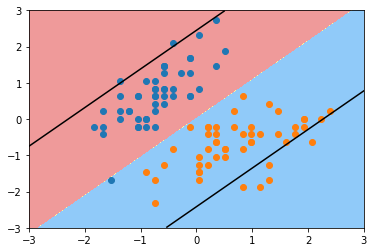

In [41]:
svm2 = LinearSVC(C=1e-2)
svm2.fit(X_standard, y)
plot_svm_decision_boundary(svm2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


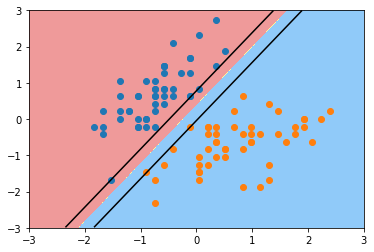

In [42]:
svm3 = LinearSVC(C=1e2)
svm3.fit(X_standard, y)
plot_svm_decision_boundary(svm3, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()
